# Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [3]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\fertlisa\\Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
data.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [9]:
data.shape

(99, 9)

In [11]:
data['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

# preprocessing of dataset

In [12]:
data.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

# Correlation matrix

In [13]:
data.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<AxesSubplot:>

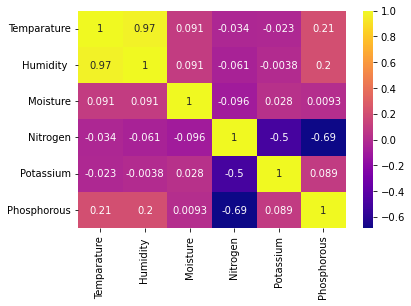

In [14]:
sns.heatmap(data.corr(),annot=True,cmap='plasma')

# Data Visualization

<AxesSubplot:xlabel='Crop Type', ylabel='count'>

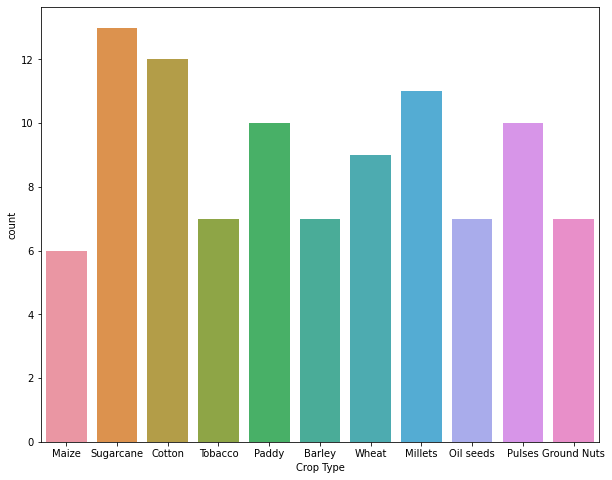

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='Crop Type', data = data)

<AxesSubplot:xlabel='Soil Type', ylabel='count'>

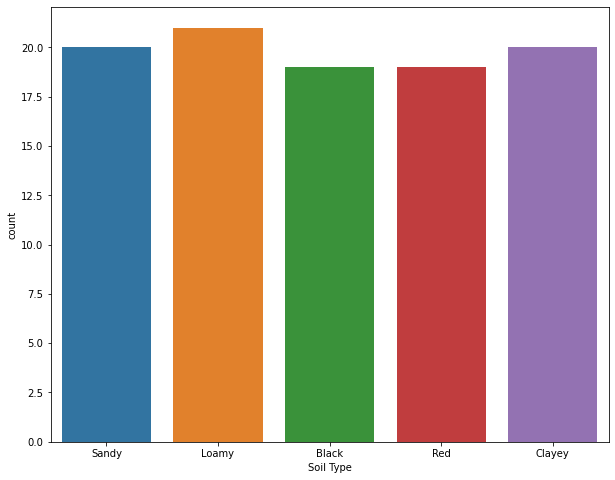

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='Soil Type', data = data)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

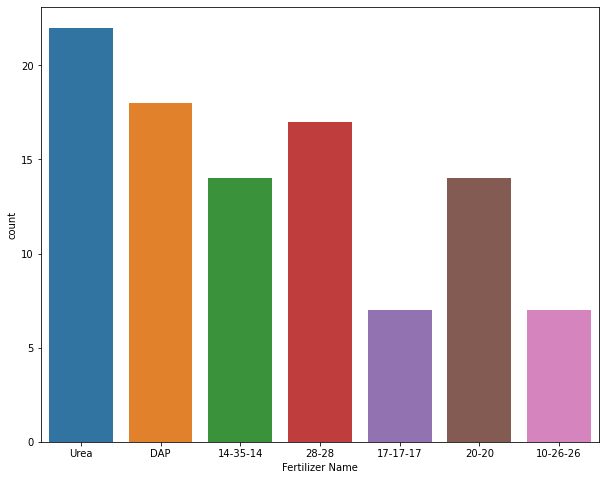

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='Fertilizer Name', data = data)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

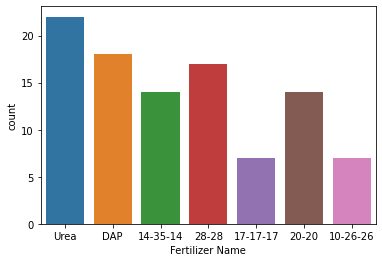

In [28]:
#Defining function for Continuous and catogorical variable
def plot_y(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(10,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = data['Fertilizer Name'])
     
def plot_fan(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = data['Fertilizer Name'], ax=axes[1])

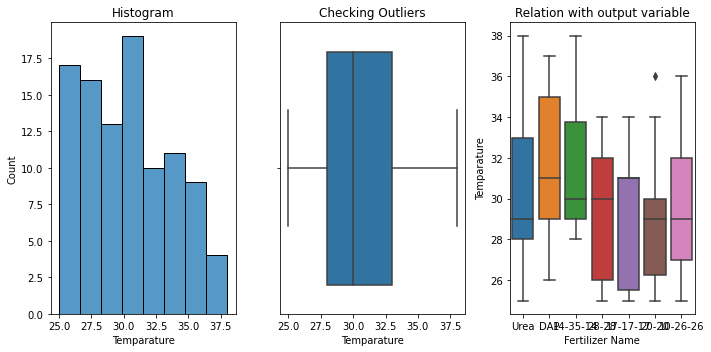

In [29]:
plot_y(data['Temparature'])

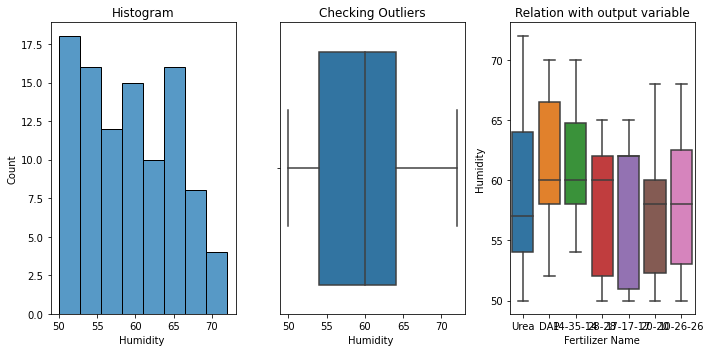

In [30]:
plot_y(data['Humidity '])

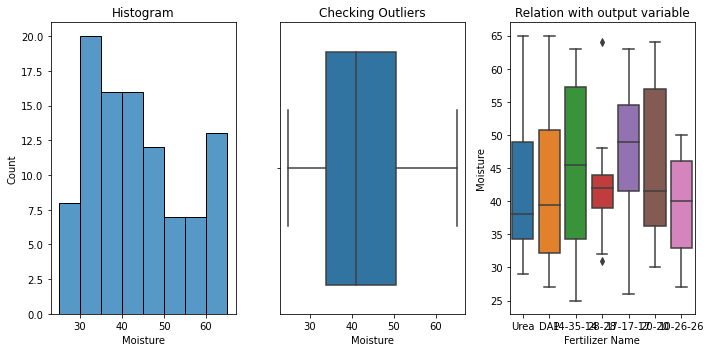

In [33]:
plot_y(data['Moisture'])

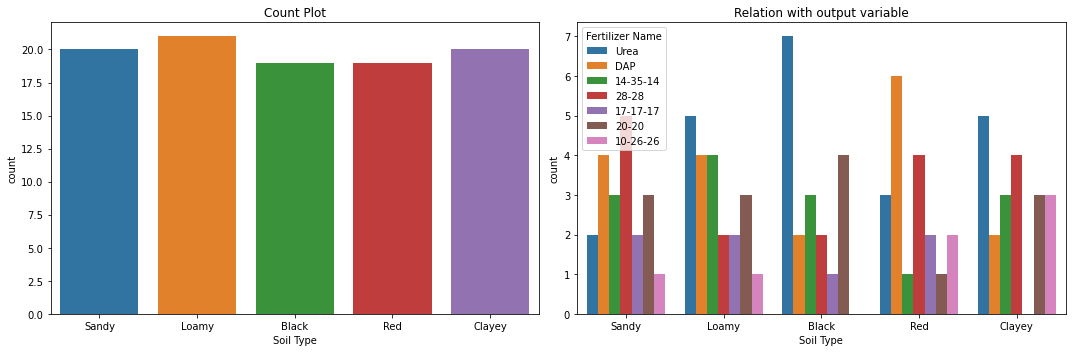

In [35]:
plot_fan(data['Soil Type'])

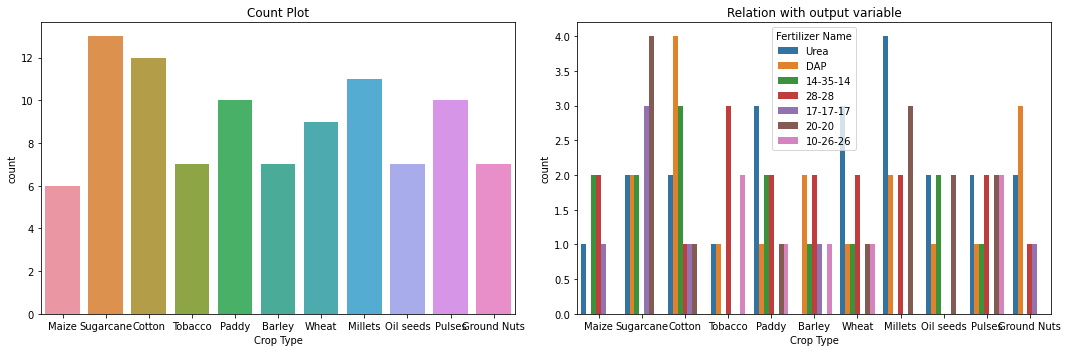

In [38]:
plot_fan(data['Crop Type'])

<AxesSubplot:xlabel='Soil Type', ylabel='Temparature'>

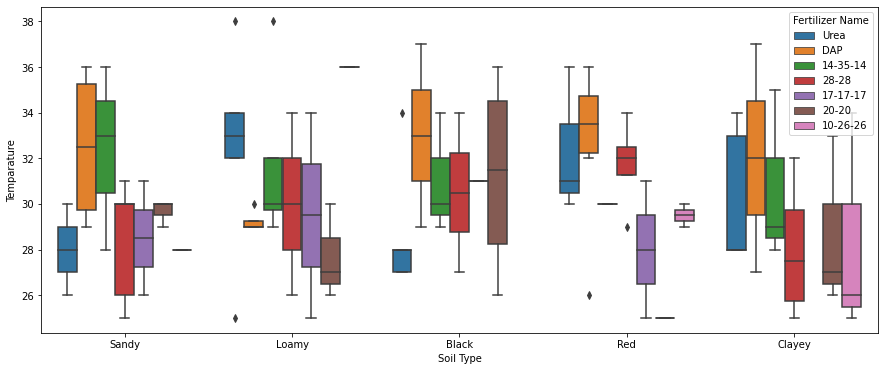

In [40]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data['Soil Type'],y=data['Temparature'],hue=data['Fertilizer Name'])

<AxesSubplot:xlabel='Fertilizer Name', ylabel='Temparature'>

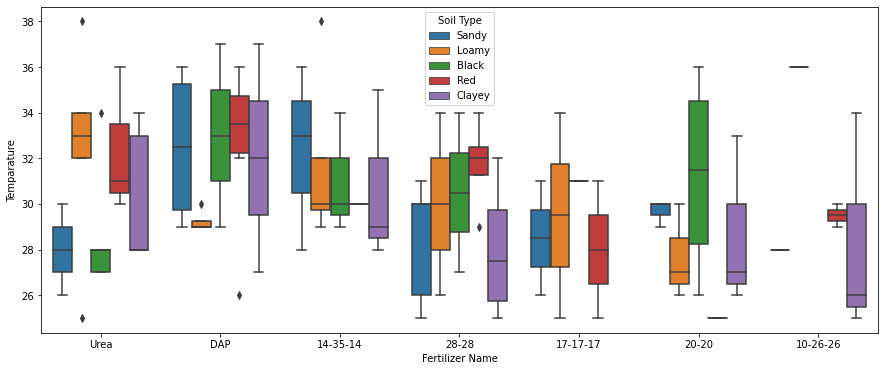

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data['Fertilizer Name'],y=data['Temparature'],hue=data['Soil Type'])

<AxesSubplot:xlabel='Crop Type', ylabel='Nitrogen'>

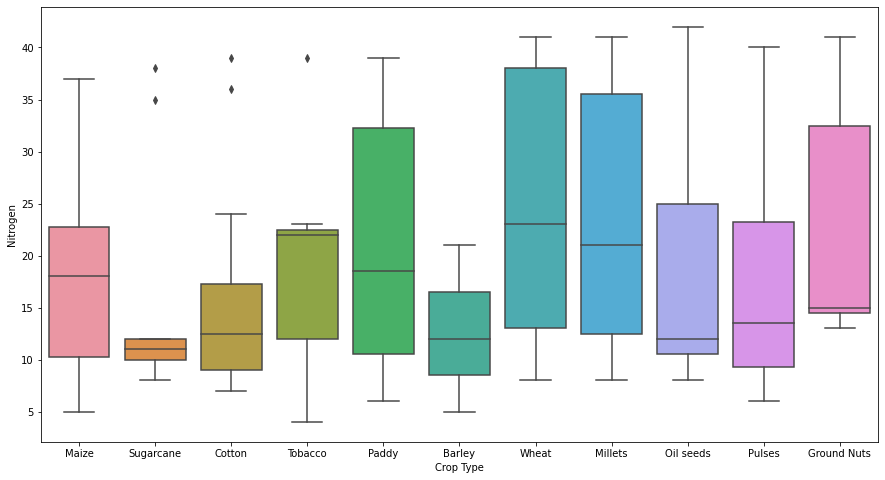

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data['Crop Type'],y=data['Nitrogen'])

<AxesSubplot:xlabel='Crop Type', ylabel='Temparature'>

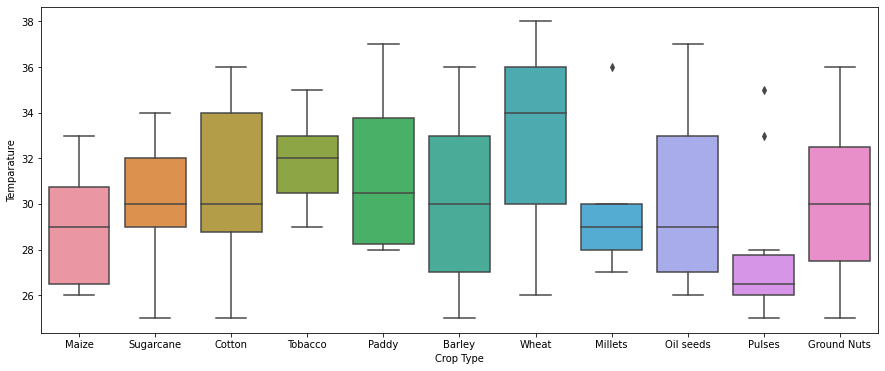

In [43]:
plt.figure(figsize=(15,6))
sns.boxplot(x=data['Crop Type'],y=data['Temparature'])

<AxesSubplot:xlabel='Crop Type', ylabel='Humidity '>

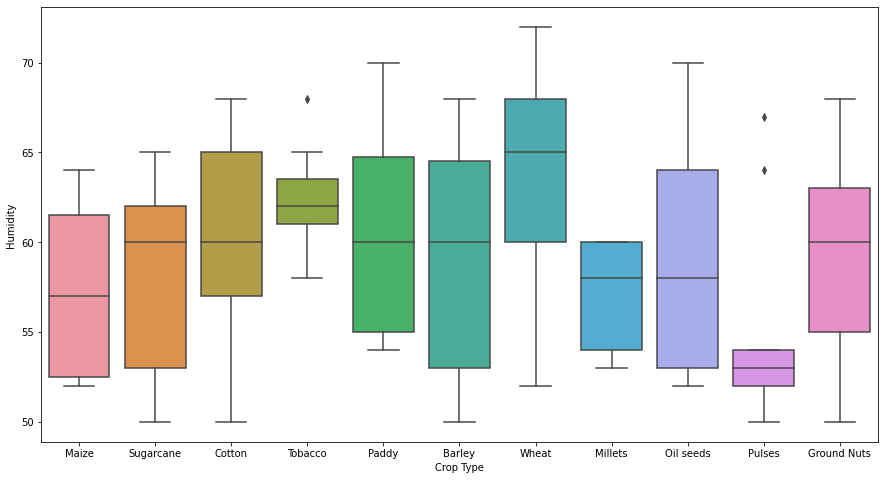

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x=data['Crop Type'],y=data['Humidity '])

# Train and Test

In [45]:
X = data.drop('Fertilizer Name', axis=1).copy()
y = data['Fertilizer Name'].copy()

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [49]:
X[0]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 26., 52., 38., 37.,  0.,  0.])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [52]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
X_train[0]

array([-0.48412292, -0.50395263, -0.54321448, -0.48412292,  2.06559112,
       -0.25993762, -0.33567254, -0.31180478,  4.33012702, -0.38069349,
       -0.25993762, -0.33567254, -0.33567254, -0.42320737, -0.23094011,
       -0.33567254,  0.76462082,  0.80219471,  0.71373089, -1.15292671,
        0.91259936,  0.80677787])

# Random Forest Classifier  with criterion of gini

In [57]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 34)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=34)

In [60]:
y_pred =model.predict(X_test)

In [61]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


0.95

In [64]:
print('Accuracy score:',model.score(X_test, y_test))

Accuracy score: 0.95


In [65]:
from sklearn.preprocessing import LabelEncoder
encode_soil = LabelEncoder()
data['Soil Type'] = encode_soil.fit_transform(data['Soil Type'])
#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [66]:
encode_crop =  LabelEncoder()
data['Crop Type'] = encode_crop.fit_transform(data['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [67]:
encode_ferti = LabelEncoder()
data['Fertilizer Name'] = encode_ferti.fit_transform(data['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [68]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer Name',axis=1),data['Fertilizer Name'],test_size=0.2,random_state=34)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [70]:
x_train.dtypes

Temparature    int64
Humidity       int64
Moisture       int64
Soil Type      int32
Crop Type      int32
Nitrogen       int64
Potassium      int64
Phosphorous    int64
dtype: object

In [71]:
Classifier= RandomForestClassifier(random_state = 34)
Classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=34)

In [73]:
pred_Classifier = Classifier.predict(x_test)
pred_Classifier

array([5, 5, 2, 6, 6, 5, 1, 5, 4, 5, 1, 6, 2, 5, 6, 5, 3, 3, 6, 1])

# Hyperparameter tuning with GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_Classifier = GridSearchCV(Classifier,params,cv=3,verbose=3,n_jobs=-1)

grid_Classifier.fit(x_train,y_train)

pred_Classifier = grid_Classifier.predict(x_test)

print(classification_report(y_test,pred_Classifier))

print('Best score : ',grid_Classifier.best_score_)
print('Best params : ',grid_Classifier.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Best score :  0.9620132953466287
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [76]:
y_train[2]

1

In [78]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_Classifier,pickle_out)
pickle_out.close()

In [81]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [82]:
model = pickle.load(open('classifier.pkl','rb'))
ans = model.predict([[34,65,62	,0,	1,	7,	9,	30]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
       print("DAP")
else:
    print("Urea")

14-35-14
